In [5]:
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd
from sklearn import linear_model

In [4]:
ruta = "./data/"
bd="lineal_horm.xlsx"
bd_horm=pd.read_excel(ruta+bd)
bd_horm

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3


In [6]:
reg = linear_model.LinearRegression()

In [27]:
X = bd_horm[["horas"]]
y = bd_horm[["monto"]]

In [28]:
reg.fit(X, y)

LinearRegression()

In [29]:
reg.coef_

array([[-0.0574463]])

In [10]:
reg.intercept_

array([34.16752817])

In [30]:
Y_pred = reg.predict(X) 
Y_pred

array([[28.4803446 ],
       [25.43569077],
       [17.33576266],
       [25.26335188],
       [22.90805363],
       [31.12287434],
       [23.59740921],
       [24.3442111 ],
       [31.18032064],
       [12.56771986],
       [12.05070318],
       [11.0741161 ],
       [32.50158551],
       [29.80160947],
       [17.16342376],
       [25.49313707],
       [23.9995333 ],
       [22.16125175],
       [27.33141863],
       [23.36762402],
       [27.56120382],
       [29.11225389],
       [30.83564285],
       [31.35265954],
       [25.55058337],
       [28.02077421],
       [26.98674084]])

In [31]:
y_estim=Y_pred.reshape(-1)
y_estim


array([28.4803446 , 25.43569077, 17.33576266, 25.26335188, 22.90805363,
       31.12287434, 23.59740921, 24.3442111 , 31.18032064, 12.56771986,
       12.05070318, 11.0741161 , 32.50158551, 29.80160947, 17.16342376,
       25.49313707, 23.9995333 , 22.16125175, 27.33141863, 23.36762402,
       27.56120382, 29.11225389, 30.83564285, 31.35265954, 25.55058337,
       28.02077421, 26.98674084])

In [32]:
x=X.to_numpy().reshape(-1)
x

array([ 99, 152, 293, 155, 196,  53, 184, 171,  52, 376, 385, 402,  29,
        76, 296, 151, 177, 209, 119, 188, 115,  88,  58,  49, 150, 107,
       125], dtype=int64)

In [33]:
y_real=y.to_numpy()
y_real=y_real.reshape(-1)
n=len(y_real)
y_real

array([25.8, 20.5, 14.3, 23.2, 20.6, 31.1, 20.9, 20.9, 30.4, 16.3, 11.6,
       11.8, 32.5, 32. , 18. , 24.1, 26.5, 25.8, 28.8, 22. , 29.7, 28.9,
       32.8, 32.5, 25.4, 31.7, 28.5])

In [34]:
residual=y_real-y_estim
residual

array([-2.68034460e+00, -4.93569077e+00, -3.03576266e+00, -2.06335188e+00,
       -2.30805363e+00, -2.28743430e-02, -2.69740921e+00, -3.44421110e+00,
       -7.80320642e-01,  3.73228014e+00, -4.50703175e-01,  7.25883902e-01,
       -1.58551177e-03,  2.19839053e+00,  8.36576241e-01, -1.39313707e+00,
        2.50046670e+00,  3.63874825e+00,  1.46858137e+00, -1.36762402e+00,
        2.13879618e+00, -2.12253889e-01,  1.96435715e+00,  1.14734046e+00,
       -1.50583369e-01,  3.67922579e+00,  1.51325916e+00])

In [35]:
den=sum((x-np.mean(x))**2)
num=sum(residual**2)/(n)
err_reg1=np.sqrt(num/den)
err_reg1


0.004295652626358282

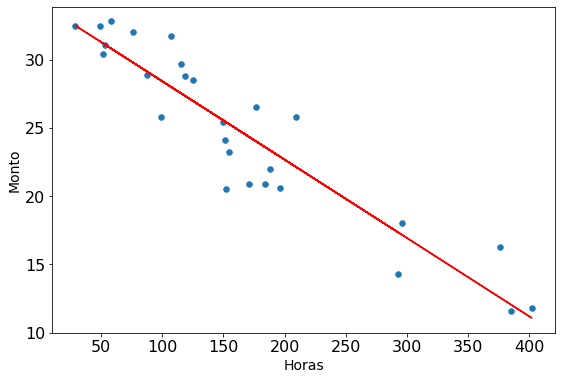

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X, y,s=30)
plt.plot(X, Y_pred, color='red')
xlabel("Horas",size=14)
ylabel("Monto",size=14)
xticks(fontsize=16)
yticks(fontsize=16)
show()

In [39]:
err_boost=np.array([])
for i in range(0,200): 
    bd_random=bd_horm.groupby("lote").sample(n=5,replace=True)
    X = bd_random[["horas"]]
    y = bd_random[["monto"]]
    reg.fit(X,y)
    Y_pred = reg.predict(X)
    y_estim=Y_pred.reshape(-1)
    x=X.to_numpy().reshape(-1)
    y_real=y.to_numpy()
    y_real=y_real.reshape(-1)
    n=len(y_real)
    residual=y_real-y_estim
    den=sum((x-np.mean(x))**2)
    num=sum(residual**2)/(n) 
    err_reg=np.sqrt(num/den)
    err_boost=np.append(err_boost,err_reg)

In [25]:
print(err_boost)

[0.0068074  0.00551683 0.00717659 0.00530166 0.00635844 0.00402298
 0.00655604 0.00885747 0.00561479 0.00601684 0.00645759 0.00520455
 0.00500171 0.0152165  0.00329816 0.00645343 0.00584282 0.01289846
 0.00789821 0.00706654 0.00346491 0.00595743 0.00488131 0.00542474
 0.00462997 0.00446769 0.00486835 0.00348108 0.00568855 0.00553677
 0.00541559 0.00625617 0.00566991 0.00533001 0.00821379 0.00634278
 0.00603687 0.00530919 0.00459227 0.00571805 0.00530051 0.00674138
 0.00861408 0.00754194 0.00639199 0.00568299 0.00650076 0.00796699
 0.00417165 0.00548594 0.00565997 0.00534405 0.00783541 0.00597083
 0.00721243 0.00601858 0.00372873 0.00408166 0.00657536 0.00499567
 0.00464741 0.00485481 0.00401925 0.00570982 0.00491468 0.00805556
 0.00497566 0.00558827 0.00721148 0.00599615 0.01063759 0.00567005
 0.00650266 0.0056605  0.00388639 0.00532081 0.0055788  0.00632406
 0.00695378 0.00630257 0.00655391 0.00434968 0.00436853 0.00400801
 0.00736588 0.00713145 0.00638907 0.00595303 0.00887542 0.0046

In [36]:
def hist_corr(cor_boost,corr1):
    fig, ax = plt.subplots(figsize=(9,6))
    hist(cor_boost,bins=50,alpha=0.5,edgecolor="white",label="Corr Boostrap")
    axvline(x=corr1,color='green', linestyle='--',linewidth=3,label="Correlacion sin boostrap")
    axvline(x=np.mean(cor_boost),color='black', linestyle='--',linewidth=3,label="correlación Boostrap$")

    axvline(percentile(cor_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
    axvline(percentile(cor_boost,97.5),color="blue",linestyle="--",linewidth=2) 
    show()
    print("Correlacion sin Bootsrap:", corr1)
    print("Promedio de la Correlacion de las muestras Bootstrap:", np.mean(cor_boost))
    print("(", percentile(cor_boost,2.5),",",percentile(cor_boost,97.5),")")

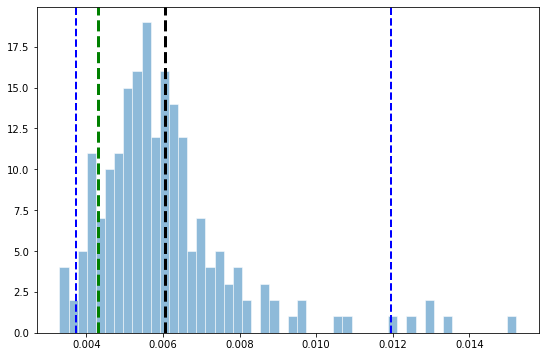

Correlacion sin Bootsrap: 0.004295652626358282
Promedio de la Correlacion de las muestras Bootstrap: 0.006046143529364344
( 0.003726694257076643 , 0.011954026844267957 )


In [38]:
hist_corr(err_boost,err_reg1)